# This is the student lshe0103 code file 

## Section 1: Set Environment

In [2]:
'''
Ensure that the "forest_cover.csv" file is in the same folder as this Python script. 
If the file is not found, an error will be raised.
'''

# Check if the forest_cover.csv file exists in the same directory
import os
if not os.path.exists("forest_cover.csv"):
    raise FileNotFoundError("The 'forest_cover.csv' file is not found. Please place the file in the same folder as this Python script.")

# Specify the Python version being used
'''
My kernel is Python 3.10.0
'''

# Install required packages if not already installed
! pip install pandas numpy matplotlib seaborn

# Import required packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seed for reproducibility
random.seed(481)

## Section 2: Import data set & Overview of Database

Import data set into python by using a panda data frame.

In [3]:
# using panda to read the csv data into python environment, should put forest_cover.csv and this ipynb file under the same folder.
df = pd.read_csv('forest_cover.csv')

# view first 3 rows to get a brief introduction to the data set.
df.head(3)

,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Forest_Cover,Neota,Rawah,Comanche Peak,Cache la Poudre
0,0,3351.0,NaN,27.0,726.0,124.0,3813.0,192.0,252.0,NaN,...,NaN,NaN,NaN,NaN,0.0,Spruce/Fir,0,1,0,0
1,1,2732.0,129.0,7.0,212.0,1.0,1082.0,231.0,236.0,137.0,...,NaN,NaN,NaN,0.0,0.0,Lodgepole Pine,0,0,1,0
2,2,2572.0,24.0,9.0,201.0,689.0,957.0,216.0,222.0,NaN,...,0.0,NaN,0.0,0.0,0.0,Lodgepole Pine,0,0,1,0


There are 30860 instances in total. 

In [4]:
# find the intance number of this dataset
print(len(df))

30860


View the dataset columns. Drop the first column since dataframe will automatically assign an ID to each row, and it need not be provided by csv file.

In [5]:
new_df = df.drop(columns=['Unnamed: 0'])
print("There are", len(new_df.dtypes), "columns in total. Below are detail:")
print(new_df.dtypes)

There are 55 columns in total. Below are detail:
Elevation                             float64
Aspect                                float64
Slope                                 float64
Horizontal_Distance_To_Hydrology      float64
Vertical_Distance_To_Hydrology        float64
Horizontal_Distance_To_Roadways       float64
Hillshade_9am                         float64
Hillshade_Noon                        float64
Hillshade_3pm                         float64
Horizontal_Distance_To_Fire_Points    float64
Soil_Type1                            float64
Soil_Type2                            float64
Soil_Type3                            float64
Soil_Type4                            float64
Soil_Type5                            float64
Soil_Type6                            float64
Soil_Type7                              int64
Soil_Type8                              int64
Soil_Type9                              int64
Soil_Type10                             int64
Soil_Type11                    

I try to search this dataset in Google, and find a very similar one on website https://www.kaggle.com/competitions/forest-cover-type-kernels-only/data. It gives me some hints about the meaning for each column. In addition, I also investigate the value of each field, which gives me further hints about the meaning. Below is just a conclusion about all attributes, and I will give more detail about why they have that meaning in the section 3.

`Elevation` = Elevation in meters.

`Aspect` = Describes the orientation of a slope relative to cardinal directions, with values measured in degrees from 0° (North) to 360°. Notice that negative degrees are also accepted here. (Range: 0 to 360).

        1. 0° or 360° or -360°: North
        2. 90° or -270°: East
        3. 180° or -180°: South
        4. 270° or -90°: West

`Slope` = The steepness or incline of the land, measured in degrees.


`Horizontal_Distance_To_Hydrology` = Horizontal distance to nearest surface water features, measured in meters.

`Vertical_Distance_To_Hydrology` = Vertical distance to nearest surface water features, measured in meters.

`Horizontal_Distance_To_Roadways` = Horizontal distance to nearest roadway, measured in meters.

`Horizontal_Distance_To_Fire_Points` = Horizontal distance to nearest wildfire ignition points, measured in meters.


`Hillshade_9am` = Hill shade index at 9am, summer solstice. (Range: 0 to 255). A value of 0 indicates complete darkness (no sunlight), while 255 represents full sunlight.

`Hillshade_Noon` = Hill shade index at noon, summer solstice. (Range: 0 to 255). A value of 0 indicates complete darkness (no sunlight), while 255 represents full sunlight.

`Hillshade_3pm` = Hill shade index at 3pm, summer solstice. (Range: 0 to 255). A value of 0 indicates complete darkness (no sunlight), while 255 represents full sunlight.



`Soil_Type1` to `Soil_Type40`: Soil Type designation, although we do not know each soil type's real-world name (such as "Cathedral family"), we can just use their ID to represent different types of soil. Each patch needs to have exactly one soil type.

`Soil_Type`: This is a **new** column, datatype is Int, you should find it after **Section 4: Data Pre-processing**. It's simply a combination of `Soil_Type1` to `Soil_Type40`. For example, if a patch have soil type 7, then in `Soil_Type` column, the value should be 7.


`Forest_Cover`: This is the **response variable** in the dataset, representing the type of forest cover in the patch (e.g., "Spruce/Fir," "Lodgepole Pine," etc.). There are 7 types in total. See below:
    
        1. 'Spruce/Fir'
        2. 'Lodgepole Pine'
        3. 'Ponderosa Pine'
        4. 'Aspen'
        5. 'Douglas-fir'
        6. 'Krummholz'
        7. 'Cottonwood/Willow'

`Neota`, `Rawah`, `Comanche Peak`, `Cache la Poudre`: These columns represent the wilderness area where the current patch belongs. Only one of these columns can be set to 1 at a time, indicating the specific wilderness area for each patch. The remaining columns will be set to 0 for the same instance.

`Wilderness_Area`: This is a **new** column, datatype is String, value can only be chosen from ["Neota", "Rawah", "Comanche Peak", "Cache la Poudre"], you should find it after **Section 4: Data Pre-processing**. It's simply a combination of `Neota`, `Rawah`, `Comanche Peak`, `Cache la Poudre`.

## Section 3: Explaination about each attributes

In this section, I will explain why I think each column with that meaning. Moreover, I will mention whether each attribute has Na or NaN.

### `Elevation`

First, Let's look at **Elevation**. It simply means the Elevation of current patch in meters. 

From below code, we know the maximum elevation is `6704.0` and minimum elevation is `-730.0`. Hence meter is a more reasonable choice for the unit. 

Lastly we know `Elevation` has NaN.

In [6]:
print("max_elevation: " + str(max(new_df['Elevation'])))
print("min_elevation: " + str(min(new_df['Elevation'])))

# prove it exactly has NAN
print("Number of NA Entry about Elevation:", new_df['Elevation'].isna().sum())

max_elevation: 6704.0
min_elevation: -730.0
Number of NA Entry about Elevation: 4937


### `Aspect`

Then, let's look at **Aspect**. From website and field name, we know it means "the orientation of a slope relative to cardinal directions, with values measured in degrees from 0° (North) to 360°". Specifically,

        1. 0° or 360° or -360°: North
        2. 90° or -270°: East
        3. 180° or -180°: South
        4. 270° or -90°: West

Normally, the direction should belongs to [0, 360]. However, in the dataset there are some entry exceed that range such as `2281.0` and `-1961.0` (see below output), hence, in section 4, we need to use `% 360` and other strategies to clean those values.



In [7]:
print("max_elevation: " + str(max(new_df['Aspect'].dropna())))
print("min_elevation: " + str(min(new_df['Aspect'].dropna())))

# prove it exactly has NAN
print(new_df['Aspect'].isna().sum())

max_elevation: 2281.0
min_elevation: -1961.0
7097


Lastly, from above code, we know it inlcudes NaN.

### `Slope`

**Slope** is easy to understand, it simply represents "the steepness or incline of the land, measured in degrees".

It also include some NaN.

In [8]:
# prove it exactly has NAN
print("Number of NAN Entry about Slope:", new_df['Slope'].isna().sum())

Number of NAN Entry about Slope: 2777


### `Horizontal_Distance_To_Hydrology` & `Vertical_Distance_To_Hydrology` & `Horizontal_Distance_To_Roadways` & `Horizontal_Distance_To_Fire_Points`

These 4 attributes' meaning are exactly described by their variable names. The unit should be meter, since it is much more reasonable than cm and km. 

From below code, we know all of them have NaN.

In [9]:
# prove it exactly has NAN
na_counts = new_df[['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 
                    'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']].isna().sum()
print(na_counts)

Horizontal_Distance_To_Hydrology      2468
Vertical_Distance_To_Hydrology        1851
Horizontal_Distance_To_Roadways       2468
Horizontal_Distance_To_Fire_Points    5863
dtype: int64


### `Hillshade_9am` & `Hillshade_Noon` & `Hillshade_3pm`

These attributes mean Hill shade index at 9am, at noon, at 3pm, respectively with summer solstice. Through search from Google, I found the domain of hillshade should be [0:250] (see website https://pro.arcgis.com/en/pro-app/latest/tool-reference/3d-analyst/hillshade.htm) with 0 representing the darkest areas (i.e. without sunlight), and 255 the brightest (i.e. with full sunlight). 

In addition, from below code, you may notice that there are some illegal values for those columns, and we should use 0 or 255 to replace those illegal values in section 4.

In [10]:
# Find Entry of those 3 hillshade column that not in [0:255]
for col in ['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']:
    min_val = new_df[col].min()
    max_val = new_df[col].max()
    out_of_range = (new_df[col] < 0) | (new_df[col] > 255)
    num_outliers = out_of_range.sum()

    if num_outliers > 0:
        print(f"{col} contains {num_outliers} out-of-range values: min={min_val}, max={max_val}")
    else:
        print(f"{col} values are within the valid range (0-255).")


Hillshade_9am contains 1081 out-of-range values: min=-132.0, max=561.0
Hillshade_Noon contains 1350 out-of-range values: min=-27.0, max=477.0
Hillshade_3pm contains 1143 out-of-range values: min=-381.0, max=669.0


From below code, we know all of them have NaN.

In [11]:
# prove it exactly has NAN
na_counts = new_df[['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']].isna().sum()
print(na_counts)

Hillshade_9am     9258
Hillshade_Noon    3703
Hillshade_3pm     8640
dtype: int64


### `Soil_Type1` to `Soil_Type40`

Those attributes just represent the soil type for current place. That's to say there are 40 types of soil in total. It is not possible for a place with more than one soil type. 

For `Soil_Type7` to `Soil_Type11`, the data type is `integer`. I think that's because they do not have `NAN` and other soil type attributes have `NAN`, and `NAN` is a float type (see below code).

In [12]:
# Check if each column only contains 0s and 1s, and print the result
for col in ['Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11']:
    if set(new_df[col].unique()) == {0, 1}:
        print(f"{col} contains only 0 and 1.")
    else:
        print(f"{col} contains other values.")


# prove Soil_Type1 column not only contain 0s and 1s but also contains NAN
unique_values = set(new_df['Soil_Type1'].unique())
if unique_values == {0, 1}:
    print("Soil_Type1 contains only 0 and 1.")
else:
    print(f"Soil_Type1 contains other values: {unique_values}")


Soil_Type7 contains only 0 and 1.
Soil_Type8 contains only 0 and 1.
Soil_Type9 contains only 0 and 1.
Soil_Type10 contains only 0 and 1.
Soil_Type11 contains only 0 and 1.
Soil_Type1 contains other values: {np.float64(0.0), np.float64(1.0), np.float64(nan)}


Lastly, from below code, we know all of them have NaN.

In [13]:
# prove it exactly has NAN
for col in range(1,41):
    if col not in [7,8,9,10,11]:
        col_name = "Soil_Type"+str(col)
        print(f"Number of NAN Entry about {col_name}:", new_df[col_name].isna().sum())

Number of NAN Entry about Soil_Type1: 5863
Number of NAN Entry about Soil_Type2: 2777
Number of NAN Entry about Soil_Type3: 5554
Number of NAN Entry about Soil_Type4: 6789
Number of NAN Entry about Soil_Type5: 3086
Number of NAN Entry about Soil_Type6: 8640
Number of NAN Entry about Soil_Type12: 15738
Number of NAN Entry about Soil_Type13: 7715
Number of NAN Entry about Soil_Type14: 7715
Number of NAN Entry about Soil_Type15: 6480
Number of NAN Entry about Soil_Type16: 6172
Number of NAN Entry about Soil_Type17: 12961
Number of NAN Entry about Soil_Type18: 6172
Number of NAN Entry about Soil_Type19: 16664
Number of NAN Entry about Soil_Type20: 18516
Number of NAN Entry about Soil_Type21: 12961
Number of NAN Entry about Soil_Type22: 9875
Number of NAN Entry about Soil_Type23: 10801
Number of NAN Entry about Soil_Type24: 14504
Number of NAN Entry about Soil_Type25: 7715
Number of NAN Entry about Soil_Type26: 16047
Number of NAN Entry about Soil_Type27: 8949
Number of NAN Entry about Soil

### `Forest_Cover`

This is the **response variable**, it illustrate the type of tree in current patch. According to below code, we find there are 7 types of tree in total, they are 'Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Aspen', 'Douglas-fir', 'Krummholz', 'Cottonwood/Willow'. 

In [14]:
# Find how many type of trees do we have
unique_classes = new_df['Forest_Cover'].unique()
print(f"Forest_Cover has {len(unique_classes)} types: {list(unique_classes)}")

Forest_Cover has 7 types: ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Aspen', 'Douglas-fir', 'Krummholz', 'Cottonwood/Willow']



From below code, we know there is no NA for this column which is correct (Because it is the response variable). 

In [15]:

# prove it does not has NA
print("Number of NA Entry about Forest_Cover:", new_df['Forest_Cover'].isna().sum())


Number of NA Entry about Forest_Cover: 0


### `Neota` & `Rawah` & `Comanche Peak` & `Cache la Poudre`

These 4 attributes represent 4 different wilderness areas. 

Except `0` and `1`, there are no other values (see below code). `0` means not belong, `1` means belong. 

In [16]:
# prove that only 0 and 1 could be the value of these 4 cols
for col in ['Neota', 'Rawah', 'Comanche Peak', 'Cache la Poudre']:
    if set(new_df[col].unique()) == {0, 1}:
        print(f"{col} contains only 0 and 1.")
    else:
        print(f"{col} contains other values.")

Neota contains only 0 and 1.
Rawah contains only 0 and 1.
Comanche Peak contains only 0 and 1.
Cache la Poudre contains only 0 and 1.


These 4 columns do not have NaN.

In [17]:
# prove below cols do not have NaN 
na_counts = new_df[['Neota', 'Rawah', 'Comanche Peak', 'Cache la Poudre']].isna().sum()
print(na_counts)

Neota              0
Rawah              0
Comanche Peak      0
Cache la Poudre    0
dtype: int64


Lastly, only one of these columns can be set to 1 at a time, indicating the specific wilderness area for each patch. The remaining columns will be set to 0 for the same instance. Through belowing code, we know this is true.

In [18]:
# try to find rows with more than one of these 4 cols set to 1
invalid_rows = new_df[(new_df[['Neota', 'Rawah', 'Comanche Peak', 'Cache la Poudre']].sum(axis=1) != 1)]
print(f"there are {len(invalid_rows)} illegal rows")

there are 0 illegal rows


## Section 4: Data pre-processing

In this part, I will resolve NA, NAN or any incorrect value in every column. And remove unnecessary columns, add useful columns.

### Step 1: Resolve NAN in `Elevation`

In this step, I will firstly analyze the average elevation of each wildness areas. 

In [19]:
"""
1. Remove rows with NaN in 'Elevation', then group the remaining data by the wilderness areas.
2. Each unique combination of values in 'Neota', 'Rawah', 'Comanche Peak', and 'Cache la Poudre' forms a separate group.
3. Calculate the average 'Elevation' for each group.

we allow to do it because I already prove 
"Only one of these columns can be set to 1 at a time, indicating the specific wilderness area for each patch. 
The remaining columns will be set to 0 for the same instance."
"""
average_elevation = new_df.dropna(subset=['Elevation']).groupby(['Neota', 'Rawah', 'Comanche Peak', 'Cache la Poudre'])['Elevation'].mean()
print(average_elevation)


Neota  Rawah  Comanche Peak  Cache la Poudre
0      0      0              1                  2317.793730
              1              0                  2968.239846
       1      0              0                  2997.471910
1      0      0              0                  3219.634183
Name: Elevation, dtype: float64


Then, I will use average to replace those missing values in `Elevation` according to their wildness area.

In [20]:
# make a dictionary for convenient
average_elevation_dict ={'Neota': 3219.634183, 'Rawah': 2997.471910, 'Comanche Peak': 2968.239846, 'Cache la Poudre': 2317.793730}

# Function to replace NaN with the average elevation based on wilderness area
def replace_elevation(row):
    if pd.isna(row['Elevation']):
        # Find the wilderness area with value 1 and use the corresponding average elevation
        wilderness_area = row[['Neota', 'Rawah', 'Comanche Peak', 'Cache la Poudre']].idxmax()
        return average_elevation_dict[wilderness_area]
    # when there is no missing value, just return the original one
    return row['Elevation']

# Apply the function to fill missing values
new_df['Elevation'] = new_df.apply(replace_elevation, axis=1)

Finally, ensure that there are no NaN values in the cleaned `new_df` while preserving the original dataset `df` unchanged.

In [21]:
# Ensure there are no NaNs in 'Elevation'
print("Number of NA Entry about Elevation in clean dataframe new_df:", new_df['Elevation'].isna().sum())

# Notice that, original df does not change
print("Number of NA Entry about Elevation in original dataframe df:", df['Elevation'].isna().sum())

Number of NA Entry about Elevation in clean dataframe new_df: 0
Number of NA Entry about Elevation in original dataframe df: 4937


### Step 2: Resolve NaN in `Soil_Type1` to `Soil_Type40`

I think each patch can only have 1 soil type. Let's check.

In [22]:
columns = [f"Soil_Type{i}" for i in range(1, 41)]

invalid_rows = new_df[(new_df[columns].sum(axis=1) > 1)]
print(f"There are {len(invalid_rows)} rows with more than 1 soil type!")

invalid_rows = new_df[(new_df[columns].sum(axis=1) < 1)]
print(f"There are {len(invalid_rows)} rows with less than 1 soil type!")

There are 0 rows with more than 1 soil type!
There are 12811 rows with less than 1 soil type!


Through above code, we know each patch can only have 1 type of soil. As for those patch without any soil type (i.e. with less than 1 soil type), they are illegal, and we need to resolve them. 

In addition, I also believe that all rows contain at least one NaN value in the columns `Soil_Type1` to `Soil_Type40`. Let's check this first. Through belowing code, we know it is true.

In [23]:
columns = [f"Soil_Type{i}" for i in range(1, 41)]
nan_rows = new_df[columns].isna().any(axis=1)

if nan_rows.all():
    print("All rows contain at least one NaN value in the specified columns.")
else:
    print("Some rows do not contain NaN values in the specified columns.")

All rows contain at least one NaN value in the specified columns.


Before addressing the NaN values, I first divided the data into four different wilderness areas since the soil types are independent in each area. This ensures that we do not use the soil types from one area to predict those in another. Moreover, we need to ensure that the valid rows in each wilderness area represent the majority, maintaining the integrity of the distribution within each area.

In [24]:

# Create a list of columns for soil types from Soil_Type1 to Soil_Type40
soil_columns = [f"Soil_Type{i}" for i in range(1, 41)]

# Initialize dictionaries to store soil data and distributions for each area
# with_0 means it contains all soil vector
result_list_with_0 = {area: [] for area in ['Neota', 'Rawah', 'Comanche Peak', 'Cache la Poudre']}
# with_1 means it only contain legal soil vector
result_list_with_1 = {area: [] for area in ['Neota', 'Rawah', 'Comanche Peak', 'Cache la Poudre']}
# used to count distribution of soil type in each wildness area
soil_distribution = {area: {} for area in ['Neota', 'Rawah', 'Comanche Peak', 'Cache la Poudre']}
# count of valid patch (i.e. patch provide exactly one soil type) in each wildness area
valid_patch_count = {area: 0 for area in ['Neota', 'Rawah', 'Comanche Peak', 'Cache la Poudre']}

# Loop through each row in the dataframe to process soil types
for _, row in new_df.iterrows():
    soil_vector = np.zeros(40, dtype=int)  # Initialize a vector to represent soil types (40 types)
    
    # For each soil column, check if the soil type is present (set the corresponding index to 1)
    for i, col in enumerate(soil_columns):
        if row[col] == 1:
            soil_vector[i] = 1
    
    # Check which wilderness area the row belongs to and store the soil vector
    for area in ['Neota', 'Rawah', 'Comanche Peak', 'Cache la Poudre']:
        if row[area] == 1:
            result_list_with_0[area].append(tuple(soil_vector))  # Store soil vector for the area
            if sum(soil_vector) == 1:  # Check if there is exactly one soil type (valid row)
                result_list_with_1[area].append(tuple(soil_vector))  # Store valid row
                valid_patch_count[area] += 1  # Increment valid patch count for the area
                
                # Track the distribution of soil types within each area
                for i, soil in enumerate(soil_vector):
                    if soil == 1:
                        soil_type = f"Soil_Type{i + 1}"  # Generate the name of the soil type
                        soil_distribution[area][soil_type] = soil_distribution[area].get(soil_type, 0) + 1  # Update count

# Calculate the proportion of valid patches in each wilderness area
for area in ['Neota', 'Rawah', 'Comanche Peak', 'Cache la Poudre']:
    total = len(result_list_with_0[area])  # Total number of patches in the area
    proportion = valid_patch_count[area] / total if total > 0 else 0  # Proportion of valid patches (patch provide exactly 1 soil type is valid)
    print(f"Proportion of {area} instance with correct soil type: {proportion}")

print("================Below is the proof of above solution=====================")
# prove above operation is correct.
print("We successfully capture",sum(len(value) for value in result_list_with_0.values()),"soil vectors from dataset.")
print("Among them,",sum(len(value) for value in result_list_with_1.values()),"are valid.")
print("There are", len(result_list_with_0['Neota']), "Neota patches and", valid_patch_count["Neota"], "are valid.")
print("There are", len(result_list_with_0['Rawah']), "Rawah patches and", valid_patch_count["Rawah"], "are valid.")
print("There are", len(result_list_with_0['Comanche Peak']), "Comanche Peak patches and", valid_patch_count["Comanche Peak"], "are valid.")
print("There are", len(result_list_with_0['Cache la Poudre']), "Cache la Poudre patches and", valid_patch_count["Cache la Poudre"], "are valid.")



Proportion of Neota instance with correct soil type: 0.5962145110410094
Proportion of Rawah instance with correct soil type: 0.4977132486388385
Proportion of Comanche Peak instance with correct soil type: 0.6283863368669023
Proportion of Cache la Poudre instance with correct soil type: 0.8935281837160751
================Below is the proof of above solution=====================
We successfully capture 30860 soil vectors from dataset.
Among them, 18049 are valid.
There are 1585 Neota patches and 945 are valid.
There are 13775 Rawah patches and 6856 are valid.
There are 13584 Comanche Peak patches and 8536 are valid.
There are 1916 Cache la Poudre patches and 1712 are valid.


Based on the previous output, except for Rawah, most instances in other areas (more than 50%) clearly label the soil type. Rawah also has about 50% of instances with valid labels. Therefore, the methodology for handling NaN values can be to use the valid soil type labels from each area to fill in missing data, ensuring that each area’s soil type distribution is respected when filling NaN values.

For rows that already have a soil type, I will fill NaN with 0. 


In [25]:
counter = 0
# Iterate through the dataframe rows
for idx, row in new_df.iterrows():
    # For rows where a soil type is already assigned (i.e., the sum of the soil vector is 1)
    nan_columns = row[soil_columns].isna()
    if sum(row[soil_columns].dropna()) == 1 and nan_columns.any():
        # Fill NaN values in the soil columns with 0, while preserving the already assigned soil type
        for i, col in enumerate(soil_columns):
            if nan_columns.iloc[i]:  # fill 0.0 if it is NaN
                new_df.loc[idx, col] = 0.0
        counter+=1
# we got this calculation, 945 + 6856 + 8536 + 1712 = 18049, from last part
print("We fill NaN with 0.0 in",counter,"correct rows (rows already have exactly one soil type). Notice that, the correct number of rows should be 945 + 6856 + 8536 + 1712 = 18049.")

We fill NaN with 0.0 in 18049 correct rows (rows already have exactly one soil type). Notice that, the correct number of rows should be 945 + 6856 + 8536 + 1712 = 18049.



For rows without a soil type, I will fill the NaN values based on the soil type distribution of the corresponding wildness area. For example, if 30% of the land is type x, 20% is type y, and 50% is type z, I will assign NaN values according to these probabilities. If a particular soil type is chosen, all other NaN values in that row will be filled with 0.

Let's firstly get distribution of each soil type in every wildness area.

In [26]:

print("valid i",valid_patch_count)
print(soil_distribution)
before_soil_distribution_percentage = {area: {} for area in ['Neota', 'Rawah', 'Comanche Peak', 'Cache la Poudre']}

# Calculate percentage for each soil type in each wilderness area
for area in ['Neota', 'Rawah', 'Comanche Peak', 'Cache la Poudre']:
    total_patches = valid_patch_count[area]  # total valid patches for the area
    for soil_type, count in soil_distribution[area].items():
        before_soil_distribution_percentage[area][soil_type] = (count / total_patches)

print("Distribution of existing soil type in every wildness area:",before_soil_distribution_percentage)

valid i {'Neota': 945, 'Rawah': 6856, 'Comanche Peak': 8536, 'Cache la Poudre': 1712}
{'Neota': {'Soil_Type23': 306, 'Soil_Type40': 66, 'Soil_Type22': 170, 'Soil_Type39': 27, 'Soil_Type38': 58, 'Soil_Type24': 55, 'Soil_Type32': 117, 'Soil_Type31': 11, 'Soil_Type25': 12, 'Soil_Type33': 73, 'Soil_Type35': 13, 'Soil_Type16': 8, 'Soil_Type19': 20, 'Soil_Type18': 2, 'Soil_Type13': 3, 'Soil_Type20': 2, 'Soil_Type29': 2}, 'Rawah': {'Soil_Type12': 780, 'Soil_Type18': 75, 'Soil_Type38': 191, 'Soil_Type30': 739, 'Soil_Type23': 927, 'Soil_Type39': 278, 'Soil_Type29': 2513, 'Soil_Type22': 696, 'Soil_Type16': 99, 'Soil_Type20': 137, 'Soil_Type40': 153, 'Soil_Type19': 71, 'Soil_Type24': 89, 'Soil_Type7': 8, 'Soil_Type9': 62, 'Soil_Type35': 22, 'Soil_Type37': 5, 'Soil_Type8': 11}, 'Comanche Peak': {'Soil_Type11': 659, 'Soil_Type22': 278, 'Soil_Type32': 1513, 'Soil_Type13': 723, 'Soil_Type10': 802, 'Soil_Type24': 421, 'Soil_Type31': 568, 'Soil_Type33': 1134, 'Soil_Type2': 263, 'Soil_Type39': 247, 'Soi

After calculate distribution of existing soil type for each patch. We can now deal with NaN.

In [27]:
counter = 0
# Iterate through each row of the dataset to handle NaN values
for idx, row in new_df.iterrows():
    # Check if the row contains NaN values (e.g., in Soil_Type columns)
    nan_columns = row[soil_columns].isna()

    # If NaN exists, we will fill them based on the distribution
    if sum(row[soil_columns].dropna()) < 1 and nan_columns.any():
        
        # Get the corresponding wilderness area
        area = None
        for wild_area in ['Neota', 'Rawah', 'Comanche Peak', 'Cache la Poudre']:
            if row[wild_area] == 1:  # this is the area for the current row
                area = wild_area
                break

        # Get the soil distribution for the specific wilderness area
        soil_distribution = before_soil_distribution_percentage[area]

        # Only select the soil types that correspond to NaN columns
        probabilities = []
        valid_soil_types = []
        for i, is_nan in enumerate(nan_columns):
            if is_nan:
                soil_type = f"Soil_Type{i + 1}"
                if soil_type in soil_distribution:
                    valid_soil_types.append(soil_type)
                    probabilities.append(soil_distribution[soil_type])

        # If this row does not have at least one corresponding NaN value for an existing soil type in the wilderness area, skip this row
        if not valid_soil_types:
            continue
    
        # Count how many rows are changed in this scenario
        counter += 1

        # Normalize the probabilities for the selected soil types
        total_prob = sum(probabilities)
        probabilities = [prob / total_prob for prob in probabilities]

        # Randomly select a soil type based on the normalized probabilities
        selected_soil_type = random.choices(valid_soil_types, probabilities)[0]

        # Construct a new soil vector, initialized to zeros
        soil_vector = np.zeros(40, dtype=int)

        # Find the index of the selected soil type
        selected_soil_index = int(selected_soil_type.split('_Type')[-1]) - 1  # Convert 'Soil_Type1' to index 0
        soil_vector[selected_soil_index] = 1  # Set the selected soil type to 1

        # Update the NaN values in the current row with the selected soil type
        for i, col in enumerate(soil_columns):
            if nan_columns.iloc[i]:  # For NaN columns, fill in the selected soil type
                new_df.loc[idx, col] = soil_vector[i]

print("We fill NaN with corresponding probability in", counter, "incorrect rows. Notice that, the correct number of rows should be equal to 12811.")


We fill NaN with corresponding probability in 12811 incorrect rows. Notice that, the correct number of rows should be equal to 12811.


Next, there is one more senario. That's each row without a soil type must have at least one corresponding NaN value for an existing soil type in the wilderness area. If no such NaN value exists, we will simply drop the row, as we cannot make predictions for it.

For example, if an invalid patch (a patch that does not provide a soil type) belongs to area X, and area X only has soil_type1, we will drop the patch (i.e., row) if it does not have a NaN value in the soil_type1 column.

In the code below, we drop rows with NaN values because the remaining rows are those that do not have an existing soil type corresponding to their respective wilderness area (refer to **valid_soil_types** in above code). 

In [28]:
# After filling NaN, drop rows where no valid soil type is assigned
new_df.dropna(subset=soil_columns, how='any', inplace=True)

print("We dropped", 30860 - len(new_df), "rows")

We dropped 0 rows


Additionaly, after performing the necessary modifications, we need to make sure that the `Soil_TypeX` columns no longer contain any NaN values and that each row corresponds to only one soil type. 

Finally, I will use four bar charts to illustrate the distribution of soil types in each wilderness area. You can ignore the code below, as it is essentially a copy of the previous section, with the exception of the graph-making code.

Proportion of Neota instances with correct soil type: 1.0
Proportion of Rawah instances with correct soil type: 1.0
Proportion of Comanche Peak instances with correct soil type: 1.0
Proportion of Cache la Poudre instances with correct soil type: 1.0
================Below is the proof of the above code=====================
We successfully captured 30860 soil vectors from the dataset.
Among them, 30860 are valid.
There are 1585 Neota patches and 1585 are valid.
There are 13775 Rawah patches and 13775 are valid.
There are 13584 Comanche Peak patches and 13584 are valid.
There are 1916 Cache la Poudre patches and 1916 are valid.
Distribution of existing soil types in every wilderness area: {'Neota': {'Soil_Type19': 0.025236593059936908, 'Soil_Type23': 0.29589905362776026, 'Soil_Type40': 0.07318611987381704, 'Soil_Type22': 0.17287066246056781, 'Soil_Type24': 0.06561514195583597, 'Soil_Type32': 0.12933753943217666, 'Soil_Type33': 0.09400630914826498, 'Soil_Type39': 0.022712933753943218, 'Soi

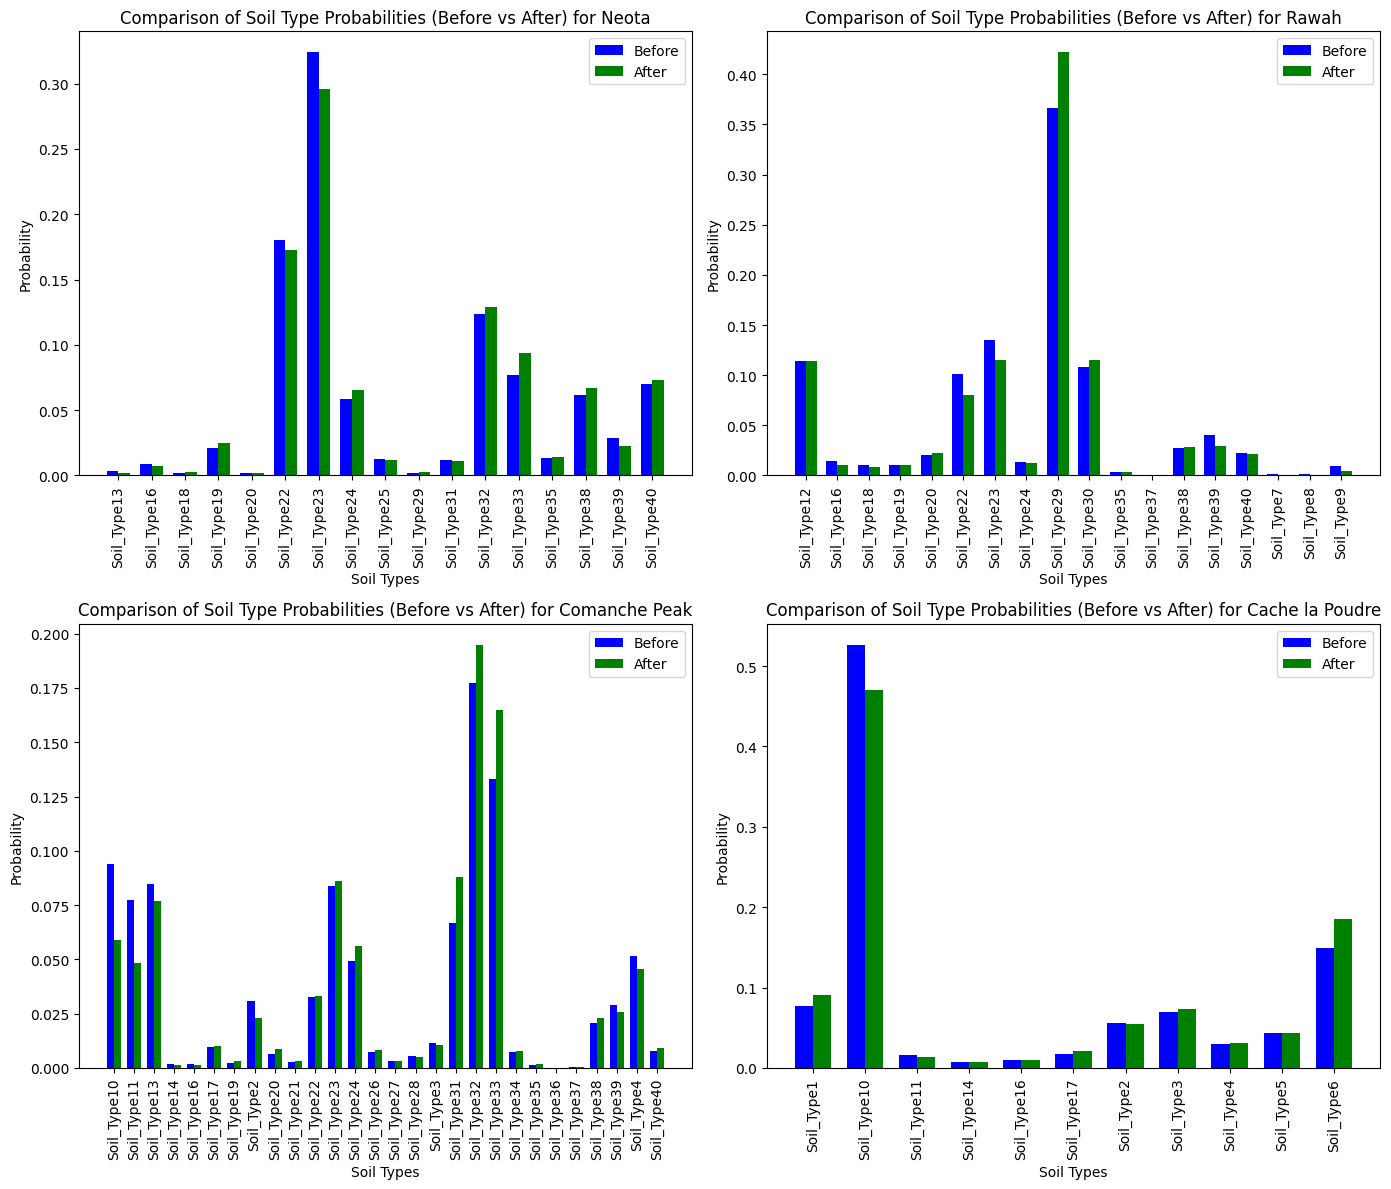

In [29]:
# Create a list of columns for soil types from Soil_Type1 to Soil_Type40
soil_columns = [f"Soil_Type{i}" for i in range(1, 41)]

# Initialize dictionaries to store soil data and distributions for each area
# with_0 means it contains all soil vectors
result_list_with_0 = {area: [] for area in ['Neota', 'Rawah', 'Comanche Peak', 'Cache la Poudre']}
# with_1 means it only contains valid soil vectors
result_list_with_1 = {area: [] for area in ['Neota', 'Rawah', 'Comanche Peak', 'Cache la Poudre']}
# Used to count the distribution of soil types in each wilderness area
soil_distribution = {area: {} for area in ['Neota', 'Rawah', 'Comanche Peak', 'Cache la Poudre']}
# Count of valid patches (i.e., patches providing exactly one soil type) in each wilderness area
valid_patch_count = {area: 0 for area in ['Neota', 'Rawah', 'Comanche Peak', 'Cache la Poudre']}

# Loop through each row in the dataframe to process soil types
for _, row in new_df.iterrows():
    soil_vector = np.zeros(40, dtype=int)  # Initialize a vector to represent soil types (40 types)
    
    # For each soil column, check if the soil type is present (set the corresponding index to 1)
    for i, col in enumerate(soil_columns):
        if row[col] == 1:
            soil_vector[i] = 1
    
    # Check which wilderness area the row belongs to and store the soil vector
    for area in ['Neota', 'Rawah', 'Comanche Peak', 'Cache la Poudre']:
        if row[area] == 1:
            result_list_with_0[area].append(tuple(soil_vector))  # Store soil vector for the area
            if sum(soil_vector) == 1:  # Check if there is exactly one soil type (valid row)
                result_list_with_1[area].append(tuple(soil_vector))  # Store valid row
                valid_patch_count[area] += 1  # Increment valid patch count for the area
                
                # Track the distribution of soil types within each area
                for i, soil in enumerate(soil_vector):
                    if soil == 1:
                        soil_type = f"Soil_Type{i + 1}"  # Generate the name of the soil type
                        soil_distribution[area][soil_type] = soil_distribution[area].get(soil_type, 0) + 1  # Update count

# Calculate the proportion of valid patches in each wilderness area
for area in ['Neota', 'Rawah', 'Comanche Peak', 'Cache la Poudre']:
    total = len(result_list_with_0[area])  # Total number of patches in the area
    proportion = valid_patch_count[area] / total if total > 0 else 0  # Proportion of valid patches (patches providing exactly 1 soil type are valid)
    print(f"Proportion of {area} instances with correct soil type: {proportion}")

print("================Below is the proof of the above code=====================")
# Prove the above operation is correct
print("We successfully captured", sum(len(value) for value in result_list_with_0.values()), "soil vectors from the dataset.")
print("Among them,", sum(len(value) for value in result_list_with_1.values()), "are valid.")
print("There are", len(result_list_with_0['Neota']), "Neota patches and", valid_patch_count["Neota"], "are valid.")
print("There are", len(result_list_with_0['Rawah']), "Rawah patches and", valid_patch_count["Rawah"], "are valid.")
print("There are", len(result_list_with_0['Comanche Peak']), "Comanche Peak patches and", valid_patch_count["Comanche Peak"], "are valid.")
print("There are", len(result_list_with_0['Cache la Poudre']), "Cache la Poudre patches and", valid_patch_count["Cache la Poudre"], "are valid.")

after_soil_distribution_percentage = {area: {} for area in ['Neota', 'Rawah', 'Comanche Peak', 'Cache la Poudre']}

# Calculate the percentage for each soil type in each wilderness area
for area in ['Neota', 'Rawah', 'Comanche Peak', 'Cache la Poudre']:
    total_patches = valid_patch_count[area]  # Total valid patches for the area
    for soil_type, count in soil_distribution[area].items():
        after_soil_distribution_percentage[area][soil_type] = (count / total_patches)

print("Distribution of existing soil types in every wilderness area:", after_soil_distribution_percentage)

# Define the regions
regions = ['Neota', 'Rawah', 'Comanche Peak', 'Cache la Poudre']

# Create a canvas with four subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each region and plot the charts
for i, region in enumerate(regions):
    # Get soil types
    soil_types_before = set(before_soil_distribution_percentage[region].keys())
    soil_types_after = set(after_soil_distribution_percentage[region].keys())

    # Get and sort all soil types
    all_soil_types = sorted(soil_types_before.union(soil_types_after))

    # Create lists of probabilities for before and after, ensuring alignment
    before_probs = [before_soil_distribution_percentage[region].get(soil_type, 0) for soil_type in all_soil_types]
    after_probs = [after_soil_distribution_percentage[region].get(soil_type, 0) for soil_type in all_soil_types]

    # Set X-axis positions and width
    x = np.arange(len(all_soil_types))
    width = 0.35

    # Create bar charts
    ax = axes[i]
    bars1 = ax.bar(x - width / 2, before_probs, width, label='Before', color='b')
    bars2 = ax.bar(x + width / 2, after_probs, width, label='After', color='g')

    # Add labels and title
    ax.set_xlabel('Soil Types')
    ax.set_ylabel('Probability')
    ax.set_title(f'Comparison of Soil Type Probabilities (Before vs After) for {region}')
    ax.set_xticks(x)
    ax.set_xticklabels(all_soil_types, rotation=90)
    ax.legend()

# Adjust layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()

### Step 3: Resolve NaN values and illegal values in `Hillshade_9am` & `Hillshade_Noon` & `Hillshade_3pm`

Firstly, let's see the percentage of missing values.

In [30]:
print(f"Proportion of NaN values in Hillshade_9am: {new_df['Hillshade_9am'].isna().sum() / len(new_df):.4f}")
print(f"Proportion of NaN values in Hillshade_Noon: {new_df['Hillshade_Noon'].isna().sum() / len(new_df):.4f}")
print(f"Proportion of NaN values in Hillshade_3pm: {new_df['Hillshade_3pm'].isna().sum() / len(new_df):.4f}")

Proportion of NaN values in Hillshade_9am: 0.3000
Proportion of NaN values in Hillshade_Noon: 0.1200
Proportion of NaN values in Hillshade_3pm: 0.2800


Each column only have very few missing values, therefore, we need not to drop these columns. Next, let's check how many rows have more than one NaN for these columns.

In [31]:
# Check how many rows have more than one NaN for the specified columns
na_counts = new_df[['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']].isna().sum(axis=1)
rows_with_one_nans = (na_counts == 1).sum()
rows_with_two_nans = (na_counts == 2).sum()
rows_with_three_nans = (na_counts == 3).sum()
print(f"Number of rows with 1 NaN: {rows_with_one_nans}")
print(f"Number of rows with 2 NaN: {rows_with_two_nans}")
print(f"Number of rows with 3 NaN: {rows_with_three_nans}")

Number of rows with 1 NaN: 13165
Number of rows with 2 NaN: 3738
Number of rows with 3 NaN: 320


As you may notice, there are 3 cases. 

    1. When we have only 1 NaN, we can simply use mean of other 2 hillshade to replace NaN
    2. When We have 2 NaN, we can use other 1 hillshade to represent all missing value
    3. when we have 3 NaN, we can simply drop those rows, since there are only 320 rows.

In [32]:
# Case 1
# Replace NaN in 'Hillshade_9am' with the mean of 'Hillshade_Noon' and 'Hillshade_3pm'
new_df['Hillshade_9am'] = new_df.apply(lambda row: row[['Hillshade_Noon', 'Hillshade_3pm']].mean() if pd.isna(row['Hillshade_9am']) else row['Hillshade_9am'], axis=1)
# Replace NaN in 'Hillshade_Noon' with the mean of 'Hillshade_9am' and 'Hillshade_3pm'
new_df['Hillshade_Noon'] = new_df.apply(lambda row: row[['Hillshade_9am', 'Hillshade_3pm']].mean() if pd.isna(row['Hillshade_Noon']) else row['Hillshade_Noon'], axis=1)
# Replace NaN in 'Hillshade_3pm' with the mean of 'Hillshade_9am' and 'Hillshade_Noon'
new_df['Hillshade_3pm'] = new_df.apply(lambda row: row[['Hillshade_9am', 'Hillshade_Noon']].mean() if pd.isna(row['Hillshade_3pm']) else row['Hillshade_3pm'], axis=1)


# Case 2
# Replace two NaNs with the available non-NaN value
new_df['Hillshade_9am'] = new_df.apply(lambda row: row['Hillshade_Noon'] if pd.isna(row['Hillshade_9am']) and pd.isna(row['Hillshade_3pm']) else row['Hillshade_9am'], axis=1)
new_df['Hillshade_Noon'] = new_df.apply(lambda row: row['Hillshade_9am'] if pd.isna(row['Hillshade_Noon']) and pd.isna(row['Hillshade_3pm']) else row['Hillshade_Noon'], axis=1)
new_df['Hillshade_3pm'] = new_df.apply(lambda row: row['Hillshade_9am'] if pd.isna(row['Hillshade_3pm']) and pd.isna(row['Hillshade_Noon']) else row['Hillshade_3pm'], axis=1)

# Case 3
# Drop rows where all three 'Hillshade' columns are NaN
new_df = new_df.dropna(subset=['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm'], how='all')

Let's make sure every NaA are removed in new_df.

In [33]:
na_counts = new_df[['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']].isna().sum(axis=1)
rows_with_one_nans = (na_counts == 1).sum()
rows_with_two_nans = (na_counts == 2).sum()
rows_with_three_nans = (na_counts == 3).sum()
print(f"Number of rows with 1 NaN: {rows_with_one_nans}")
print(f"Number of rows with 2 NaN: {rows_with_two_nans}")
print(f"Number of rows with 3 NaN: {rows_with_three_nans}")

Number of rows with 1 NaN: 0
Number of rows with 2 NaN: 0
Number of rows with 3 NaN: 0


Let's make sure 320 rows are deleted from new_df.

In [34]:
print("we remove", len(df)-len(new_df), "rows successfully.")
print("In the new_df, we now only have", len(new_df), "rows.")

we remove 320 rows successfully.
In the new_df, we now only have 30540 rows.


Finally, we need to address the invalid values in these three attributes. Since the valid range for these attributes is [0, 255], any entry greater than 255 will be set to 255, and any entry less than 0 will be set to 0.

In [35]:
# Define the columns we need to check
hillshade_columns = ['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']

# Check if there are any values that are illegal
illegal_values_check = new_df[hillshade_columns].apply(lambda x: ((x < 0) | (x > 255)).sum())
print("Illegal values in each column (before adjustment):")
print(illegal_values_check)

# Loop through the specified columns and fix illegal values
for col in hillshade_columns:
    # Set values greater than 255 to 255
    new_df[col] = new_df[col].apply(lambda x: 255 if x > 255 else x)
    # Set values less than 0 to 0
    new_df[col] = new_df[col].apply(lambda x: 0 if x < 0 else x)

# Check if there are any values that are still illegal
illegal_values_check = new_df[hillshade_columns].apply(lambda x: ((x < 0) | (x > 255)).sum())
print("Illegal values in each column (after adjustment):")
print(illegal_values_check)


Illegal values in each column (before adjustment):
Hillshade_9am     1635
Hillshade_Noon    1606
Hillshade_3pm     1582
dtype: int64
Illegal values in each column (after adjustment):
Hillshade_9am     0
Hillshade_Noon    0
Hillshade_3pm     0
dtype: int64


### Step 4: Resolve NaN values and illegal values in `Horizontal_Distance_To_Hydrology` & `Vertical_Distance_To_Hydrology` & `Horizontal_Distance_To_Roadways` & `Horizontal_Distance_To_Fire_Point`

Firstly, let's see the percentage of missing values.

In [36]:
# Define the list of columns you want to check
columns_to_check = [
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Horizontal_Distance_To_Fire_Points'
]
# Find rows with NaN values in any of the specified columns
rows_with_nan = new_df[columns_to_check].isna().any(axis=1)

# Count the number of unique rows with NaN in at least one of the columns
unique_nan_rows = rows_with_nan.sum()

print(f"Number of unique rows with NaN in at least one of the 4 columns: {unique_nan_rows}")

# Loop through each column and print the total count, missing count, and missing proportion
for column in columns_to_check:
    total_count = len(new_df[column])
    missing_count = new_df[column].isna().sum()
    missing_proportion = missing_count / total_count
    print(f"Column: {column}")
    print(f"  Total count: {total_count}")
    print(f"  Missing count: {missing_count}")
    print(f"  Proportion of NaN values: {missing_proportion:.4f}")
    print("-" * 40)


Number of unique rows with NaN in at least one of the 4 columns: 10877
Column: Horizontal_Distance_To_Hydrology
  Total count: 30540
  Missing count: 2444
  Proportion of NaN values: 0.0800
----------------------------------------
Column: Vertical_Distance_To_Hydrology
  Total count: 30540
  Missing count: 1831
  Proportion of NaN values: 0.0600
----------------------------------------
Column: Horizontal_Distance_To_Roadways
  Total count: 30540
  Missing count: 2451
  Proportion of NaN values: 0.0803
----------------------------------------
Column: Horizontal_Distance_To_Fire_Points
  Total count: 30540
  Missing count: 5803
  Proportion of NaN values: 0.1900
----------------------------------------


Before proceeding further, I want to first address the incorrect values for these four attributes. I believe only the vertical distance should include negative values, as it can indicate whether the water is above or below the patch. However, for horizontal distance, negative values do not make sense to me.

In [37]:
# List of attributes to modify (horizontal distances)
horizontal_attributes = ['Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways']

# Loop through each of the horizontal attributes
for attribute in horizontal_attributes:
    # Apply absolute value transformation to any negative values
    new_df[attribute] = new_df[attribute].apply(lambda x: abs(x) if x < 0 else x)

Now, let's see the relationship between `Forest_Cover` and `Horizontal_Distance_To_Fire_Points`, `Horizontal_Distance_To_Hydrology`, `Vertical_Distance_To_Hydrology`, and `Horizontal_Distance_To_Roadways`, respectively. 

Horizontal_Distance_To_Fire_Points Mean:
Forest_Cover
Aspen                2169.481013
Cottonwood/Willow     850.075000
Douglas-fir          1896.753247
Krummholz            3052.096584
Lodgepole Pine       2861.496789
Ponderosa Pine       1792.712182
Spruce/Fir           2724.968202
Name: Horizontal_Distance_To_Fire_Points, dtype: float64
Horizontal_Distance_To_Fire_Points IQR:
Forest_Cover
Aspen                1006.50
Cottonwood/Willow     789.50
Douglas-fir           825.25
Krummholz            1945.00
Lodgepole Pine       1644.00
Ponderosa Pine        718.50
Spruce/Fir           1654.00
Name: Horizontal_Distance_To_Fire_Points, dtype: float64
Horizontal_Distance_To_Fire_Points Difference (Mean - IQR):
Forest_Cover
Aspen                1162.981013
Cottonwood/Willow      60.575000
Douglas-fir          1071.503247
Krummholz            1107.096584
Lodgepole Pine       1217.496789
Ponderosa Pine       1074.212182
Spruce/Fir           1070.968202
Name: Horizontal_Distance_To_Fire_Points,

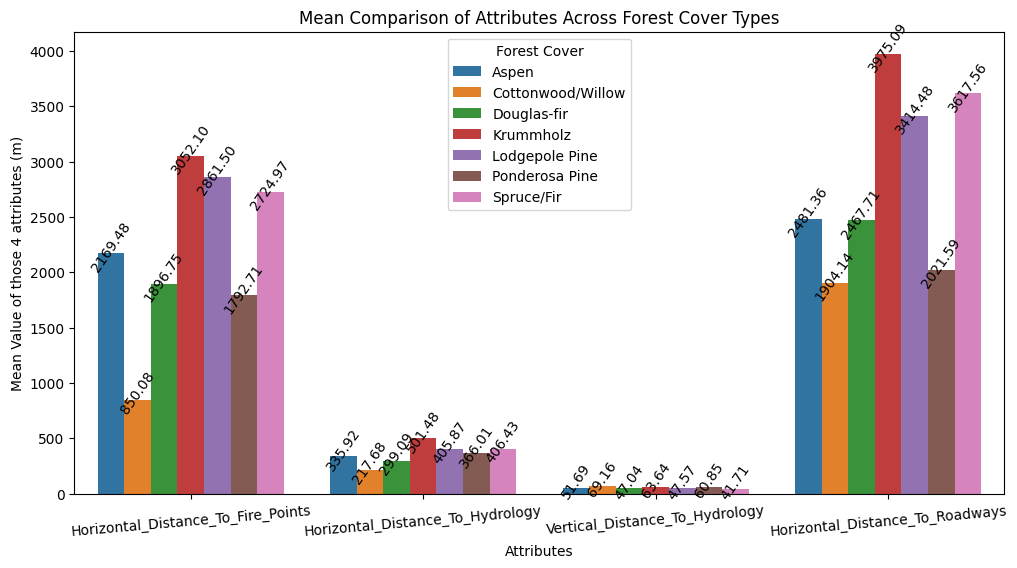

In [38]:
# List of attributes you want to compare
attributes = ['Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Hydrology', 
              'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways']

# Create empty dictionaries
mean_values_dict_before = {}
iqr_values_dict = {}

# Loop over attributes and compute the mean & std for each 'Forest_Cover' category
for attribute in attributes:
    means = new_df.groupby('Forest_Cover')[attribute].mean()

    mean_values_dict_before[attribute] = means  # Store pd.Series in dictionary

    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each 'Forest_Cover' category
    Q1 = new_df.groupby('Forest_Cover')[attribute].quantile(0.25)
    Q3 = new_df.groupby('Forest_Cover')[attribute].quantile(0.75)
    
    # Calculate IQR as Q3 - Q1
    IQR = Q3 - Q1
    iqr_values_dict[attribute] = IQR

# Loop over the attributes and print both mean and IQR for each attribute
for attribute in attributes:
    mean_values = mean_values_dict_before[attribute]
    iqr_values = iqr_values_dict[attribute]
    # Calculate the difference between the mean and IQR
    difference = mean_values - iqr_values
    
    print(f"{attribute} Mean:\n{mean_values}")
    print(f"{attribute} IQR:\n{iqr_values}")
    print(f"{attribute} Difference (Mean - IQR):\n{difference}")
    print("-" * 50)  # Print a separator line for clarity

# Convert the dictionary to a DataFrame for easier plotting
mean_df = pd.DataFrame(mean_values_dict_before).reset_index()

# Plot the bar chart comparing means of different attributes across Forest Cover categories
mean_df = mean_df.melt(id_vars='Forest_Cover', var_name='Attribute', value_name='Mean Value')

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Attribute', y='Mean Value', hue='Forest_Cover', data=mean_df)

plt.title('Mean Comparison of Attributes Across Forest Cover Types')
plt.xlabel('Attributes')
plt.ylabel('Mean Value of those 4 attributes (m)')

# Rotate the x-axis labels
plt.xticks(rotation=5)

# Add the mean value labels on top of the bars and rotate the numbers
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the bar height is greater than 0
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points', rotation=55)

plt.legend(title='Forest Cover')
plt.show()


I did not divide the dataset based on different wilderness areas because the four columns in question do not seem to be closely related to the wilderness area, unlike soil type. In addition, Although the IQR indicates that the data may not be tightly distributed around the mean, I just need a rough understanding of the distribution of these columns to help me decide whether they should be kept. The specific relationship with the response variable will need to be analyzed further before making any conclusions.

From the graph above, I observed that Vertical_Distance_To_Hydrology might has a weak connection with the response variable, so I decided to drop this column.

For the remaining columns, I plan to fill their NaN values using the mean value corresponding to each type of forest cover. This approach will help preserve the overall distribution. I cannot simply drop the rows with missing values, as there are 10,877 unique rows (approximately one-third of the data) with NaN in at least one of the four columns. Additionally, this methodology is appropriate, as the missing values account for only about 5% in each of the columns.

In [39]:
new_df = new_df.drop(columns=['Vertical_Distance_To_Hydrology'])

# prove deletion is succeed
try:
    # Try to access the columns to check if they exist
    print(new_df[['Vertical_Distance_To_Hydrology']])
except KeyError as e:
    # Catch KeyError if columns are not found and print a message
    print("Successfully deleted the following columns: ['Vertical_Distance_To_Hydrology']")


# List of columns to check and fill
columns_to_check = ['Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways']

counter = 0
# Iterate through each row in the DataFrame
for index, row in new_df.iterrows():
    for column in columns_to_check:
        # Check if the value is NaN for check columns
        if pd.isna(row[column]):
            # Use mean value from mean_values_dict to fill NaN
            new_df.loc[index, column] = mean_values_dict_before[column].loc[row['Forest_Cover']] # row['Forest_Cover'] means the corresponding forest cover of current row.
            counter+=1

# notice that, we drop the Vertical_Distance_To_Hydrology column before fill NaN, so the number should be smaller
print("We fill NaN with corresponing mean in",counter,"rows. Notice that, the correct number of rows should be less than or equal to 10,877 (since drop one column).") 

Successfully deleted the following columns: ['Vertical_Distance_To_Hydrology']
We fill NaN with corresponing mean in 10698 rows. Notice that, the correct number of rows should be less than or equal to 10,877 (since drop one column).


Finally, let's make sure there is no missing value in these 3 col and distribution is remained.

Missing values after filling NaNs:
Horizontal_Distance_To_Fire_Points    0
Horizontal_Distance_To_Hydrology      0
Horizontal_Distance_To_Roadways       0
dtype: int64


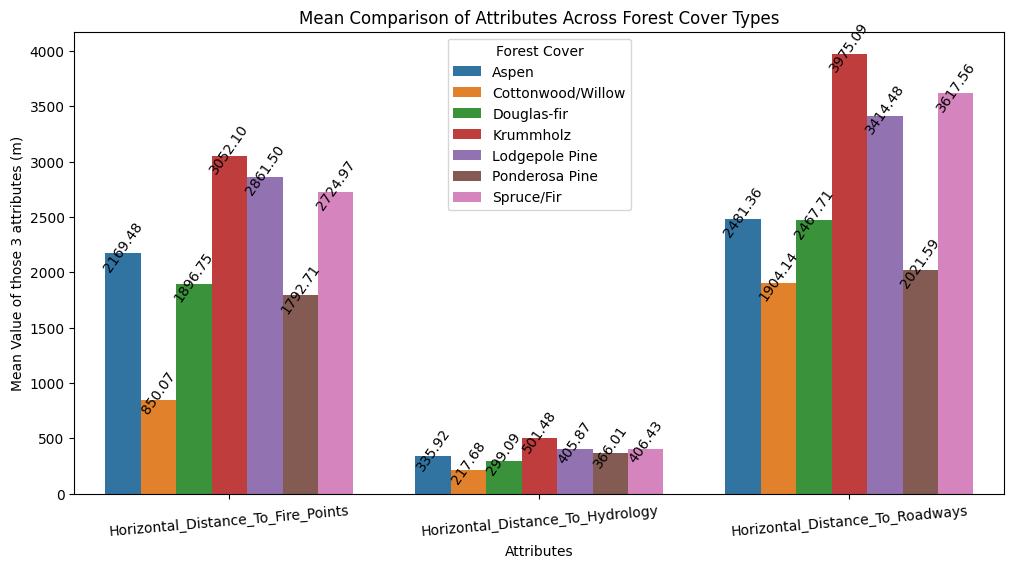

In [40]:
# 1. Verify there are no missing values
missing_values = new_df[columns_to_check].isna().sum()
print("Missing values after filling NaNs:")
print(missing_values)


mean_values_dict_after = {}

# Loop over attributes and compute the mean for each 'Forest_Cover' category
for attribute in columns_to_check:
    # Calculate the mean for each 'Forest_Cover' category
    means = new_df.groupby('Forest_Cover')[attribute].mean()
    mean_values_dict_after[attribute] = means  # Store pd.seiries in dictionary

# Convert the dictionary to a DataFrame for easier plotting
mean_df = pd.DataFrame(mean_values_dict_after).reset_index()

# Plot the bar chart comparing means of different attributes across Forest Cover categories
mean_df = mean_df.melt(id_vars='Forest_Cover', var_name='Attribute', value_name='Mean Value')

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Attribute', y='Mean Value', hue='Forest_Cover', data=mean_df)

plt.title('Mean Comparison of Attributes Across Forest Cover Types')
plt.xlabel('Attributes')
plt.ylabel('Mean Value of those 3 attributes (m)')

# Rotate the x-axis labels
plt.xticks(rotation=5)

# Add the mean value labels on top of the bars and rotate the numbers
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the bar height is greater than 0
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points', rotation=55)

plt.legend(title='Forest Cover')
plt.show()

### Step 5: Resolve NaN values and illegal values in `Aspect` and `Slope`

Firstly, let's see the percentage of missing values.

In [41]:
print(f"Proportion of NaN values in Aspect: {new_df['Aspect'].isna().sum() / len(new_df):.4f}")
print(f"Proportion of NaN values in Slope: {new_df['Slope'].isna().sum() / len(new_df):.4f}")

Proportion of NaN values in Aspect: 0.2300
Proportion of NaN values in Slope: 0.0898


For `Aspect`, we need to make sure it within the range of [0:360].

In [42]:
def process_aspect(aspect_value):
    # Ensure the value is within -360 to 360
    aspect_value = aspect_value % 360
    
    # Convert negative values to positive equivalents
    if aspect_value < 0:
        aspect_value += 360
    
    return aspect_value

# Apply the transformation to the 'Aspect' column in your DataFrame
new_df['Aspect'] = new_df['Aspect'].apply(process_aspect)

Now, let's examine the Mean and IQR of these two attributes based on different types of forest cover, as well as the relationship between these two columns and the response variable

Aspect Mean:
Forest_Cover
Aspen                139.938596
Cottonwood/Willow    144.388430
Douglas-fir          184.029412
Krummholz            143.830346
Lodgepole Pine       152.455650
Ponderosa Pine       173.144027
Spruce/Fir           156.553432
Name: Aspect, dtype: float64
Aspect IQR:
Forest_Cover
Aspen                115.0
Cottonwood/Willow     83.0
Douglas-fir          268.5
Krummholz            136.0
Lodgepole Pine       171.0
Ponderosa Pine       181.0
Spruce/Fir           218.0
Name: Aspect, dtype: float64
Aspect Difference (Mean - IQR):
Forest_Cover
Aspen                24.938596
Cottonwood/Willow    61.388430
Douglas-fir         -84.470588
Krummholz             7.830346
Lodgepole Pine      -18.544350
Ponderosa Pine       -7.855973
Spruce/Fir          -61.446568
Name: Aspect, dtype: float64
--------------------------------------------------
Slope Mean:
Forest_Cover
Aspen                16.950113
Cottonwood/Willow    19.526718
Douglas-fir          18.473747
Krummholz         

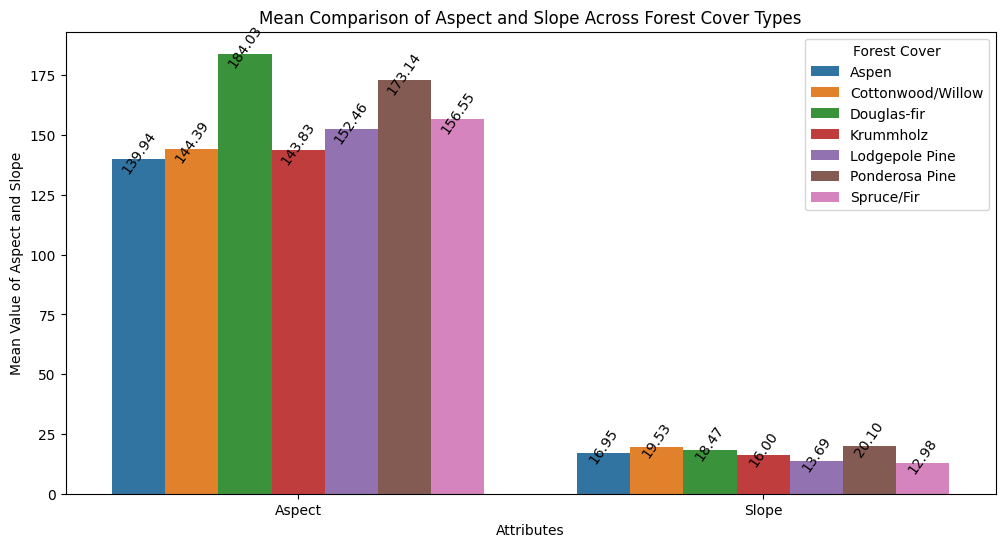

In [43]:
# List of attributes you want to compare
attributes = ['Aspect', 'Slope']

# Create empty dictionaries
mean_values_dict_before = {}
iqr_values_dict = {}

# Loop over attributes and compute the mean & std for each 'Forest_Cover' category
for attribute in attributes:
    means = new_df.groupby('Forest_Cover')[attribute].mean()

    mean_values_dict_before[attribute] = means  # Store pd.Series in dictionary

    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each 'Forest_Cover' category
    Q1 = new_df.groupby('Forest_Cover')[attribute].quantile(0.25)
    Q3 = new_df.groupby('Forest_Cover')[attribute].quantile(0.75)
    
    # Calculate IQR as Q3 - Q1
    IQR = Q3 - Q1
    iqr_values_dict[attribute] = IQR

# Loop over the attributes and print both mean and IQR for each attribute
for attribute in attributes:
    mean_values = mean_values_dict_before[attribute]
    iqr_values = iqr_values_dict[attribute]
    # Calculate the difference between the mean and IQR
    difference = mean_values - iqr_values
    
    print(f"{attribute} Mean:\n{mean_values}")
    print(f"{attribute} IQR:\n{iqr_values}")
    print(f"{attribute} Difference (Mean - IQR):\n{difference}")
    print("-" * 50)  # Print a separator line for clarity

# List of attributes you want to compare with 'Forest_Cover_Num'
attributes = ['Aspect', 'Slope']

# Create an empty dictionary to store the mean values for each attribute and forest cover type
# it is a dict of panda.series
mean_values_dict_before = {}

# Loop over attributes and compute the mean for each 'Forest_Cover' category
for attribute in attributes:
    # Calculate the mean for each 'Forest_Cover' category
    means = new_df.groupby('Forest_Cover')[attribute].mean()
    mean_values_dict_before[attribute] = means  # Store pd.series in dictionary

# Convert the dictionary to a DataFrame for easier plotting
mean_df = pd.DataFrame(mean_values_dict_before).reset_index()

# Plot the bar chart comparing means of different attributes across Forest Cover categories
mean_df = mean_df.melt(id_vars='Forest_Cover', var_name='Attribute', value_name='Mean Value')

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Attribute', y='Mean Value', hue='Forest_Cover', data=mean_df)

# Title and labels
plt.title('Mean Comparison of Aspect and Slope Across Forest Cover Types')
plt.xlabel('Attributes')
plt.ylabel('Mean Value of Aspect and Slope')


# Add the mean value labels on top of the bars and rotate the numbers
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the bar height is greater than 0
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points', rotation=55)

# Show the legend with title 'Forest Cover'
plt.legend(title='Forest Cover')
plt.show()



As for me, I don’t believe these features have a strong relationship with the response variable. For Aspect, there is little difference between southward (180 degrees) and southeastward (140 degrees). Additionally, for Slope, the means are nearly identical. Looking at their IQR and mean, it’s clear that the data is not concentrated around the mean. As a result, I’ve decided to remove these two columns.

In [44]:
new_df = new_df.drop(columns=['Aspect', 'Slope'])

# prove deletion is succeed
try:
    # Try to access the columns to check if they exist
    print(new_df[['Aspect', 'Slope']])
except KeyError as e:
    # Catch KeyError if columns are not found and print a message
    print("Successfully deleted the following columns: ['Aspect', 'Slope']")

Successfully deleted the following columns: ['Aspect', 'Slope']


### Step 6: Combinie `Soil_TypeX` columns

Since each patch can only have one type of soil, therefore, I decided to combine them into one columns, then it is much easier for me to do the Exploratory data analysis.

In [45]:
# # Use idxmax to find the column name with the highest value in each row and assign it to new column
new_df['Soil_Type'] = new_df.loc[:, 'Soil_Type1':'Soil_Type40'].idxmax(axis=1).str.extract('(\d+)').astype(int)

Now, let's remove the Soil_TypeX columns, as they are redundant.

In [46]:
soil_type_columns = [f'Soil_Type{i}' for i in range(1, 41)]

# new_df = new_df.drop(columns=soil_type_columns)

In [47]:
new_df.head(5)

,Elevation,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type1,Soil_Type2,Soil_Type3,...,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Forest_Cover,Neota,Rawah,Comanche Peak,Cache la Poudre,Soil_Type
0,3351.0,726.0,3813.0,192.0,252.0,222.0,2271.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Spruce/Fir,0,1,0,0,30
1,2732.0,212.0,1082.0,231.0,236.0,137.0,912.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Lodgepole Pine,0,0,1,0,32
2,2572.0,201.0,957.0,216.0,222.0,219.0,2191.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Lodgepole Pine,0,0,1,0,11
3,2824.0,417.0,3223.0,214.0,214.0,214.0,6478.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Lodgepole Pine,0,1,0,0,12
4,2529.0,120.0,1092.0,185.0,231.0,139.0,4983.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Lodgepole Pine,0,1,0,0,18


### Step 7: Combine `Neota`, `Rawah`, `Comanche Peak`, `Cache la Poudre` columns

These four columns represent wilderness areas. We can add a new column and use the strings Neota, Rawah, Comanche Peak, or Cache la Poudre to indicate the location of each patch.

In [48]:
wilderness_columns = ['Neota', 'Rawah', 'Comanche Peak', 'Cache la Poudre']

# Use idxmax to find the column name with the highest value in each row and assign it to new column
new_df['Wilderness_Area'] = new_df[wilderness_columns].idxmax(axis=1)


Then, I just simply drop these 4 columns.

In [49]:
# new_df.drop(columns=wilderness_columns, inplace=True)
new_df.head(5)

,Elevation,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type1,Soil_Type2,Soil_Type3,...,Soil_Type38,Soil_Type39,Soil_Type40,Forest_Cover,Neota,Rawah,Comanche Peak,Cache la Poudre,Soil_Type,Wilderness_Area
0,3351.0,726.0,3813.0,192.0,252.0,222.0,2271.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Spruce/Fir,0,1,0,0,30,Rawah
1,2732.0,212.0,1082.0,231.0,236.0,137.0,912.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Lodgepole Pine,0,0,1,0,32,Comanche Peak
2,2572.0,201.0,957.0,216.0,222.0,219.0,2191.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Lodgepole Pine,0,0,1,0,11,Comanche Peak
3,2824.0,417.0,3223.0,214.0,214.0,214.0,6478.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Lodgepole Pine,0,1,0,0,12,Rawah
4,2529.0,120.0,1092.0,185.0,231.0,139.0,4983.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Lodgepole Pine,0,1,0,0,18,Rawah


## Section 5: Exploratory data analysis

Before we start, I would like to demonstrate the number of instances and columns in the clean dataset. 

In [50]:
print("There are",len(new_df),"instances in the new dataset! Remember, before we clean the data, there are", len(df), "instances.")
new_df.head(10)

There are 30540 instances in the new dataset! Remember, before we clean the data, there are 30860 instances.


,Elevation,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type1,Soil_Type2,Soil_Type3,...,Soil_Type38,Soil_Type39,Soil_Type40,Forest_Cover,Neota,Rawah,Comanche Peak,Cache la Poudre,Soil_Type,Wilderness_Area
0,3351.00000,726.000000,3813.000000,192.0,252.0,222.0,2271.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,Spruce/Fir,0,1,0,0,30,Rawah
1,2732.00000,212.000000,1082.000000,231.0,236.0,137.0,912.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,Lodgepole Pine,0,0,1,0,32,Comanche Peak
2,2572.00000,201.000000,957.000000,216.0,222.0,219.0,2191.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,Lodgepole Pine,0,0,1,0,11,Comanche Peak
3,2824.00000,417.000000,3223.000000,214.0,214.0,214.0,6478.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,Lodgepole Pine,0,1,0,0,12,Rawah
4,2529.00000,120.000000,1092.000000,185.0,231.0,139.0,4983.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,Lodgepole Pine,0,1,0,0,18,Rawah
5,2050.00000,366.009781,192.000000,75.0,201.0,246.0,255.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,Ponderosa Pine,0,0,0,1,10,Cache la Poudre
6,3004.00000,960.000000,5814.000000,211.0,244.0,227.5,2861.496789,0.0,0.0,0.0,...,0.0,0.0,0.0,Lodgepole Pine,0,1,0,0,20,Rawah
7,3232.00000,406.433833,1342.000000,175.5,229.0,122.0,2270.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,Spruce/Fir,0,1,0,0,38,Rawah
8,3141.00000,503.000000,3414.475808,228.0,241.0,147.0,1354.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,Lodgepole Pine,0,1,0,0,12,Rawah
9,2997.47191,30.000000,630.000000,183.0,225.0,141.0,300.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,Lodgepole Pine,0,1,0,0,30,Rawah


In [51]:
print(new_df.dtypes)

Elevation                             float64
Horizontal_Distance_To_Hydrology      float64
Horizontal_Distance_To_Roadways       float64
Hillshade_9am                         float64
Hillshade_Noon                        float64
Hillshade_3pm                         float64
Horizontal_Distance_To_Fire_Points    float64
Soil_Type1                            float64
Soil_Type2                            float64
Soil_Type3                            float64
Soil_Type4                            float64
Soil_Type5                            float64
Soil_Type6                            float64
Soil_Type7                              int64
Soil_Type8                              int64
Soil_Type9                              int64
Soil_Type10                             int64
Soil_Type11                             int64
Soil_Type12                           float64
Soil_Type13                           float64
Soil_Type14                           float64
Soil_Type15                       

### Soil type and Forest cover

See which kind of soil is prefered by each type of trees.

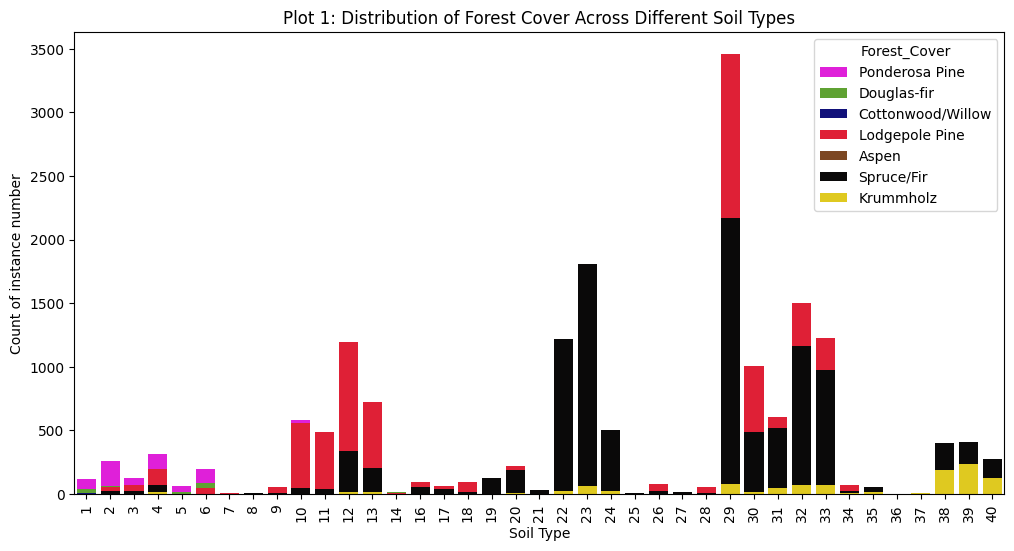

In [52]:
# Create a mapping of tree species to dark colors
forest_cover_colors = {
    'Spruce/Fir': '#0a0909',  
    'Lodgepole Pine': '#ff001e',  
    'Ponderosa Pine': '#ff00f7',  
    'Aspen': '#8B4513', 
    'Douglas-fir': '#5bb51f',  
    'Krummholz': '#ffe100',  
    'Cottonwood/Willow': '#00008B'  
}

# Create a stacked bar plot similar to the given code for 'Region' and 'Gender' groupby
plt.figure(figsize=(12, 6))

# We use 'countplot' to simulate stacked bar behavior
sns.countplot(data=new_df, x="Soil_Type", hue="Forest_Cover", dodge=False, 
              palette=forest_cover_colors)  # Apply the color dictionary here

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Add plot title and labels
plt.title("Plot 1: Distribution of Forest Cover Across Different Soil Types")
plt.xlabel("Soil Type")
plt.ylabel("Count of instance number")

# Show the plot
plt.show()

### Elevation and Forest cover type

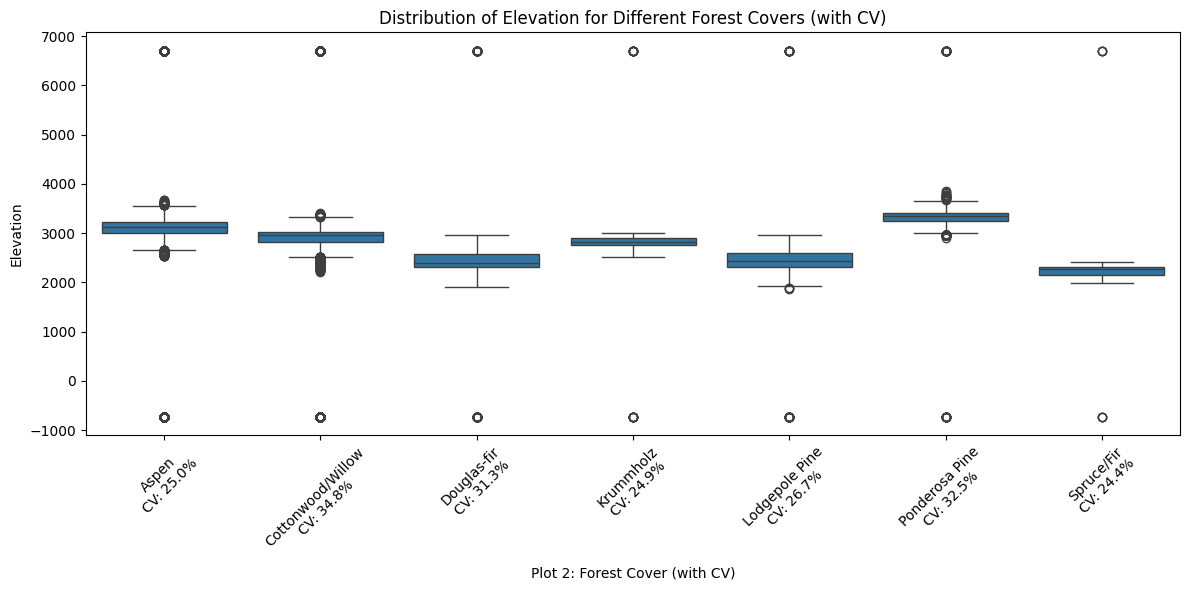

In [53]:
# Compute mean and standard deviation for each Forest_Cover
mean_elevation = new_df.groupby('Forest_Cover')['Elevation'].mean()
std_elevation = new_df.groupby('Forest_Cover')['Elevation'].std()

# Compute Coefficient of Variation (CV) in percentage
cv = (std_elevation / mean_elevation) * 100

# Create new x-axis labels with CV values
x_labels = [f"{cover}\nCV: {cv[cover]:.1f}%" for cover in mean_elevation.index]

# Create a boxplot of Elevation for each Forest_Cover
plt.figure(figsize=(12, 6))
sns.boxplot(data=new_df, x='Forest_Cover', y='Elevation')

# Set new x-axis labels with rotation
plt.xticks(ticks=range(len(mean_elevation.index)), labels=x_labels, rotation=45)

# Add plot title and labels
plt.title("Distribution of Elevation for Different Forest Covers (with CV)")
plt.xlabel("Plot 2: Forest Cover (with CV)")
plt.ylabel("Elevation")

# Show the plot
plt.tight_layout()
plt.show()


## Section 6: Some analysis for dicussion part in report

### Dataset compare

In [54]:
# Calculate the number of missing values per column
missing_values = df.isnull().sum()

# Calculate the total number of rows
total_rows = len(df)

# Calculate the ratio of missing values per column
missing_ratio = missing_values / total_rows

# Print the missing ratio for each column
print(missing_ratio)


Unnamed: 0                            0.000000
Elevation                             0.159981
Aspect                                0.229974
Slope                                 0.089987
Horizontal_Distance_To_Hydrology      0.079974
Vertical_Distance_To_Hydrology        0.059981
Horizontal_Distance_To_Roadways       0.079974
Hillshade_9am                         0.300000
Hillshade_Noon                        0.119994
Hillshade_3pm                         0.279974
Horizontal_Distance_To_Fire_Points    0.189987
Soil_Type1                            0.189987
Soil_Type2                            0.089987
Soil_Type3                            0.179974
Soil_Type4                            0.219994
Soil_Type5                            0.100000
Soil_Type6                            0.279974
Soil_Type7                            0.000000
Soil_Type8                            0.000000
Soil_Type9                            0.000000
Soil_Type10                           0.000000
Soil_Type11  

In [55]:
# Count the number of rows for each Forest_Cover category
forest_cover_count = new_df.groupby('Forest_Cover').size()

# Calculate the total number of rows
total_rows = len(new_df)

# Calculate the percentage of each category
forest_cover_percentage = (forest_cover_count / total_rows) * 100

# Combine the count and percentage into a single DataFrame for better readability
forest_cover_summary = pd.DataFrame({
    'Count': forest_cover_count,
    'Percentage': forest_cover_percentage
})

# Print the summary
print(forest_cover_summary)


                   Count  Percentage
Forest_Cover                        
Aspen                483    1.581532
Cottonwood/Willow    141    0.461690
Douglas-fir          927    3.035363
Krummholz           1049    3.434840
Lodgepole Pine     14783   48.405370
Ponderosa Pine      1876    6.142764
Spruce/Fir         11281   36.938441


## Section 7: Output clean dataset into csv file

In [56]:
new_df.to_csv('lshe0103_A1_CleanDataset.csv', index=False, header=True)